In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 5, 10
import rawpy
import matplotlib.pyplot as plt
import ollama
import time

In [2]:
base_dir="/mnt/pictures/"
pics = ["2019/01/_DSC1240.NEF", # lunar eclipse
        "2019/03/_DSC1504.NEF", # Lake
        "2021/_DSC2910.NEF", # Monument
        "2021/_DSC3166.NEF", # Milky Way
        "2021/_DSC3715.NEF", # Beach
        "2023/_DSC4231.NEF", # Bird
        "2023/_DSC4178.NEF", # Dinosaur
        "2024/_DSC4336.NEF" # Fountain
       ]

In [3]:
raws = [rawpy.imread(base_dir+f) for f in pics]

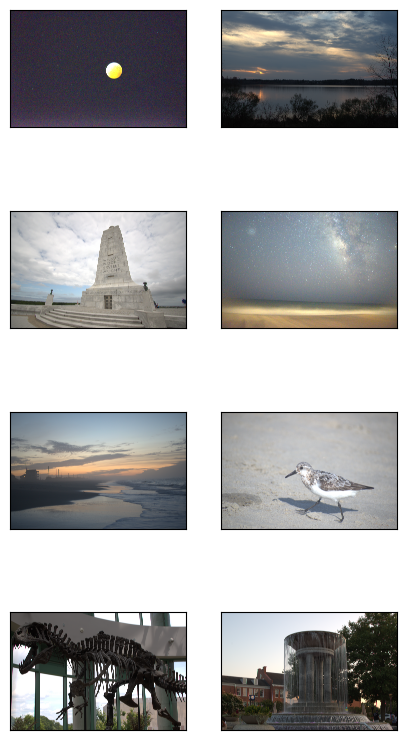

In [4]:
fig, axs = plt.subplots(4, 2)
for r, a in zip(raws, axs.flatten()):
    rgb = r.postprocess(use_auto_wb=True)
    a.imshow(rgb)
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)

In [5]:
models = ["gemma3:4b", "gemma3n:e4b"]
for model in models:
    print(f"Model {model}")
    for i, pic in enumerate(raws):
        print(f"Image #{i}")
        thumb = pic.extract_thumb()
        start = time.time()
        resp = ollama.generate(model=model, prompt="Describe this image.", images=[thumb.data])
        print(f"time: {time.time()-start:.2} seconds\n{resp.response}\n\n")
        

Model gemma3:4b
Image #0
time: 6.7e+01 seconds
Here's a description of the image:

**Overall Impression:** The image depicts a dramatic scene of a lunar eclipse. The dominant feature is a bright, reddish-orange moon centered in the frame. 

**Details:**

*   **Moon:** The moon is the clear focal point. It appears as a full circle, intensely reddish-orange in color. This coloration is a direct result of the Earth's atmosphere refracting and scattering sunlight, a phenomenon known as "blood moon" during a total lunar eclipse.
*   **Background:** The background is entirely dark, indicating a nighttime setting. The darkness emphasizes the prominence of the moon.
*   **Composition:** The composition is simple and impactful, drawing the viewer's attention directly to the moon.

**In summary,** the image is a striking visual representation of a total lunar eclipse, showcasing the eerie beauty and wonder of this celestial event.


Image #1
time: 9.6 seconds
Here's a description of the image:

